In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# set random seed for reproducibility
np.random.seed(42)

# problem parameters
a = 0.1
k = 50
x_min, x_max = 0, 100

# arbitrary chices
m_true = 2.0
b_true = 1.0

#### 1. Generate random x values

In [40]:
x = np.random.uniform(x_min, x_max, k)
x = np.random.uniform(-1, 1, k)

#### 2. Compute true y values (withou noise)

In [41]:
y_true = m_true * x + b_true

#### 3. Add noise 
I used truncated normal distribution to ensure noise stays within [-a, a]

In [42]:
noise = np.random.normal(0, a/3, k)  # std dev a/3 to make ±3σ ≈ ±a
noise = np.clip(noise, -a, a)  # enforce bounds
y_noisy = y_true + noise
y_noisy

array([ 0.20024474, -0.96497831,  1.60476452, -0.34531448,  2.74610328,
        2.85201266,  2.66160023,  0.44470998, -0.96201699,  2.73592751,
        0.68839104,  2.87383456,  2.85599897,  2.39031781,  0.24926037,
        0.56152155,  2.33704193,  0.27390316, -0.34408856,  1.25561949,
        2.71820174,  1.78029464,  1.29707759, -0.58243552,  1.42001903,
        2.94906536, -0.45549545,  1.05154097,  2.56834076,  1.97657386,
        1.7460335 ,  1.84053173,  0.50870314,  0.20878289,  2.18679896,
        2.22431244,  2.51051965,  2.62937323,  1.06016358,  1.03188631,
        2.16228303,  1.59787154,  1.70786751,  2.14902442,  2.55160243,
        0.31038785,  0.55674552, -0.67174362,  1.29845241, -0.85187289])

In [43]:
noise = np.random.normal(0, np.sqrt(a), k)
y_noisy = y_true + noise
y_noisy

array([ 0.57886008, -1.35679561,  1.94971386, -0.2883213 ,  2.45145405,
        2.96184426,  2.72240576,  0.29082956, -0.91610018,  2.59142739,
        0.74863393,  3.07600338,  3.35602246,  2.02060619,  0.85231995,
       -0.07691345,  2.35654802,  0.45373026, -0.23317158,  1.03029017,
        2.67880506,  1.6282186 ,  1.09387118, -0.34262625,  1.57292712,
        2.74109815, -0.15518548,  1.17049525,  2.76654186,  2.16218059,
        1.52591172,  1.63279154,  0.67427959,  0.3673834 ,  2.23083496,
        2.27755576,  2.87232239,  2.46589091,  1.21837698,  0.94212625,
        2.12434388,  1.94731947,  2.06888708,  2.44042501,  2.97285001,
        0.35862263,  0.71798428, -0.7221872 ,  1.41563097, -0.89738575])

#### 4. Gradient descent implementation

In [44]:
def gradient_descent(x, y, learning_rate=0.0001, iterations=1000):
    # Initialize parameters
    m = 0.0
    b = 0.0
    K = len(x)
    
    # To store loss history
    loss_history = []
    
    for i in range(iterations):
        # Predicted y
        y_pred = m * x + b
        
        # Calculate error (MSE loss)
        error = y_pred - y
        loss = np.sum(error ** 2) / (2 * K)
        loss_history.append(loss)
        
        # Calculate gradients
        grad_m = np.sum(error * x) / K
        grad_b = np.sum(error) / K
        
        # Update parameters
        m -= learning_rate * grad_m
        b -= learning_rate * grad_b
        
    return m, b, loss_history

In [49]:
# Run gradient descent
learning_rate = 0.01
iterations = 1000
m_est, b_est, loss_history = gradient_descent(x, y_noisy, learning_rate, iterations)

# Results
print(f"True parameters: m = {m_true:.4f}, b = {b_true:.4f}")
print(f"Estimated parameters: m = {m_est:.4f}, b = {b_est:.4f}")

True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 1.9403, b = 1.0690


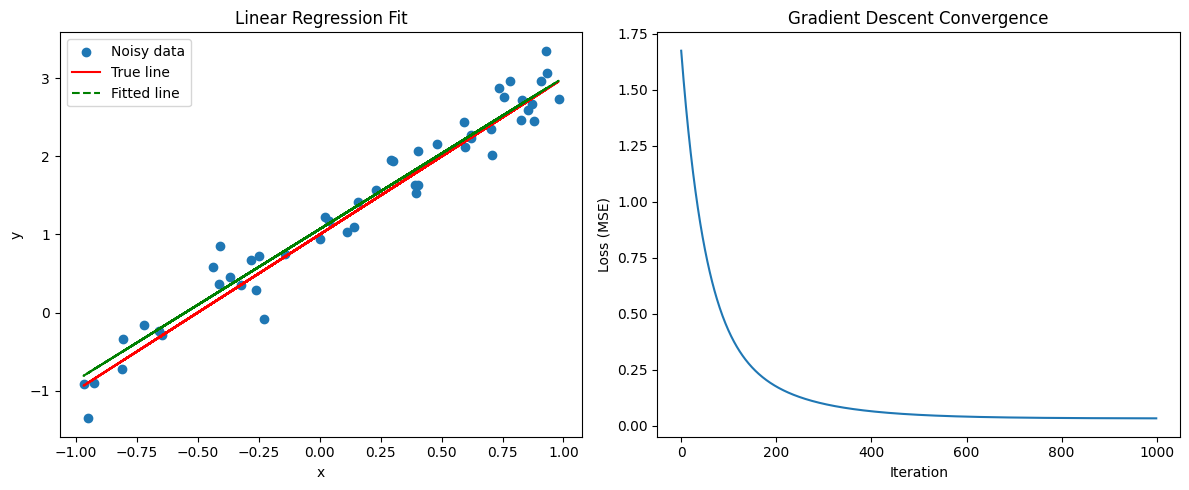

In [50]:
# Plotting
plt.figure(figsize=(12, 5))

# Plot 1: Data and fitted line
plt.subplot(1, 2, 1)
plt.scatter(x, y_noisy, label='Noisy data')
plt.plot(x, y_true, 'r-', label='True line')
plt.plot(x, m_est * x + b_est, 'g--', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Fit')

# Plot 2: Loss over iterations
plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Gradient Descent Convergence')

plt.tight_layout()
plt.show()

## QUESTION #2 

#### STEP 1. Initializing Data To See Different Result Based On The HW

In [54]:
def initialize(**kwargs):
    # problem parameters
    a = 0.1
    k = 50
    x_min, x_max = 0, 100
    learning_rate = 0.0001
    tolerance = 1e-6
    iterations = 100

    # arbitrary chices
    m_true = 2.0
    b_true = 1.0

    if kwargs.get('k'):
        k = kwargs['k']
        print(f'set k(number of samples) to {k}')
    
    if kwargs.get('a'):
        a = kwargs['a']
        print(f'set a to {a}')

    if kwargs.get('learning_rate'):
        learning_rate = kwargs['learning_rate']
        print(f'set learning_rate to {learning_rate}')

    if kwargs.get('iterations'):
        iterations = kwargs['iterations']
        print(f'set iterations to {iterations}')

    if kwargs.get('tolerance'):
        tolerance = kwargs['tolerance']
        print(f'set tolerance to {tolerance}')

    # Generate X
    x = np.random.uniform(x_min, x_max, k)

    # Calculate True Y
    y_true = m_true * x + b_true

    # Generate Noise
    noise = np.random.normal(0, np.sqrt(a), k)
    # noise = np.clip(noise, -a, a)
    y_noisy = y_true + noise

    return {
        'a': a,
        'k': k,
        'x_min': x_min,
        'x_max': x_max,
        'm_true': m_true,
        'b_true': b_true,
        'x': x,
        'y_true': y_true,
        'y_noisy': y_noisy,
        'learning_rate': learning_rate,
        'tolerance': tolerance,
        'iterations': iterations,
    }

#### STEP 2. Implement Gradient Descent Algorithm But This Time In a Function

In [29]:
def gradient_descent(x, y, learning_rate=0.0001, iterations=1000, tolerance=1e-6):
    # Initialize parameters
    m = 0.0
    b = 0.0
    K = len(x)
    
    # To store loss history
    loss_history = []
    
    for i in range(iterations):
        # Predicted y
        y_pred = m * x + b
        
        # Calculate error (MSE loss)
        error = y_pred - y
        loss = np.sum(error ** 2) / (2 * K)
        loss_history.append(loss)

        # Check for convergence
        if i > 0 and abs(loss_history[-2] - loss_history[-1]) < tolerance:
            break
        
        # Calculate gradients
        grad_m = np.sum(error * x) / K
        grad_b = np.sum(error) / K
        
        # Update parameters
        m -= learning_rate * grad_m
        b -= learning_rate * grad_b
        
    return m, b, loss_history

#### STEP 3. Print Result, Including Estimated slope & Intersect 

In [50]:
def print_result(m_true, b_true, m_est, b_est, loss_history):
    print(f"True parameters: m = {m_true:.4f}, b = {b_true:.4f}")
    print(f"Estimated parameters: m = {m_est:.4f}, b = {b_est:.4f}")
    print(f"Converged after {len(loss_history)} iterations")

#### STEP 4. Visualizing on Plots

In [31]:
def visualize(x, y_true, y_noisy, m_est, b_est, K, loss_history):
    # Plotting
    plt.figure(figsize=(12, 5))

    # Plot 1: Data and fitted line
    plt.subplot(1, 2, 1)
    plt.scatter(x, y_noisy, alpha=0.5, label='Noisy data')
    plt.plot(x, y_true, 'r-', label='True line')
    plt.plot(x, m_est * x + b_est, 'g--', label='Fitted line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Linear Regression Fit (K={K})')

    # Plot 2: Loss over iterations
    plt.subplot(1, 2, 2)
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss (MSE)')
    plt.title('Gradient Descent Convergence')
    plt.yscale('log')  # Log scale to better see convergence

    plt.tight_layout()
    plt.show()

#### Step 5. PLAY ;)

In [62]:
def play(**kwargs):
    # step 1
    result = initialize(**kwargs)
    m_true = result['m_true']
    b_true = result['b_true']
    k = result['k']
    x = result['x']
    y_true = result['y_true']
    y_noisy = result['y_noisy']
    learning_rate = result['learning_rate']
    tolerance = result['tolerance']
    iterations = result['iterations']

    # step 2
    m_est, b_est, loss_history = gradient_descent(x, y_true, learning_rate, iterations, tolerance)

    # step 3
    print_result(m_true, b_true, m_est, b_est, loss_history)
    
    # step 4
    visualize(x, y_true, y_noisy, m_est, b_est, k, loss_history)

#### Playing With Number of Samples

set k(number of samples) to 50
set learning_rate to 0.0001
set iterations to 100
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0152, b = 0.0346
Converged after 100 iterations


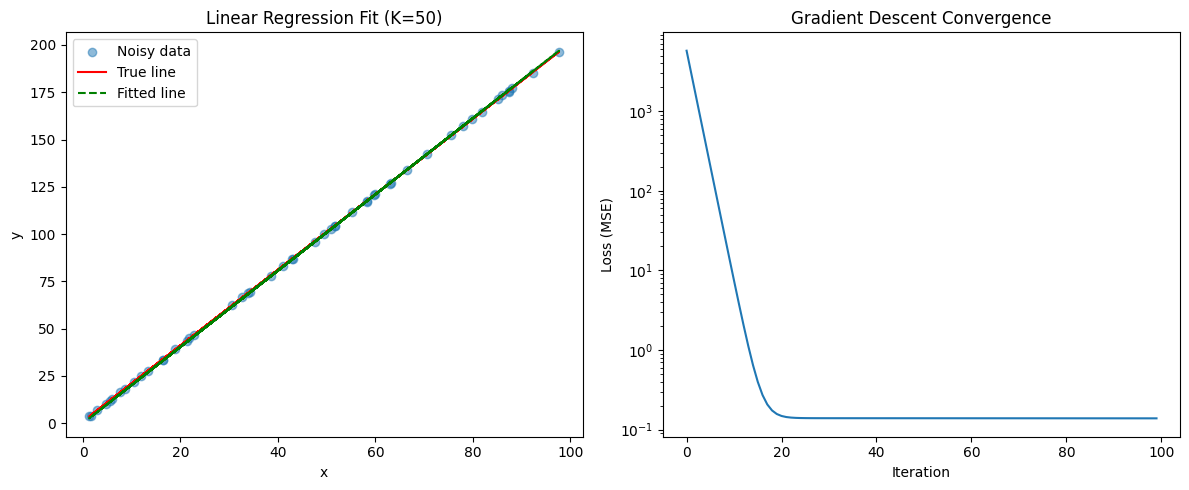

In [83]:
play(k=50, iterations=100, learning_rate=0.0001)

set k(number of samples) to 500
set iterations to 100
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0143, b = 0.0321
Converged after 100 iterations


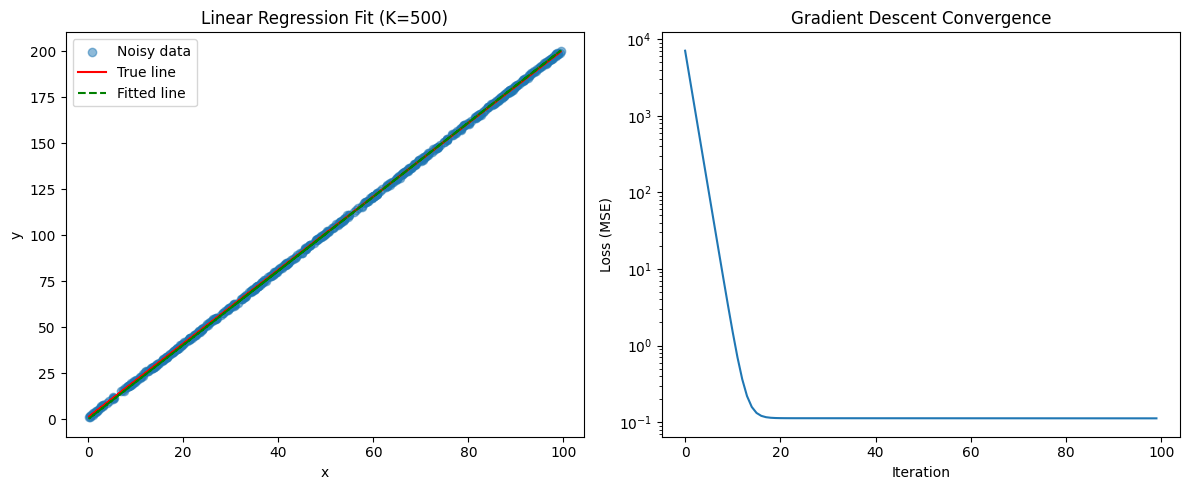

In [84]:
play(k=500, iterations=100)

set k(number of samples) to 5000
set iterations to 100
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0145, b = 0.0325
Converged after 100 iterations


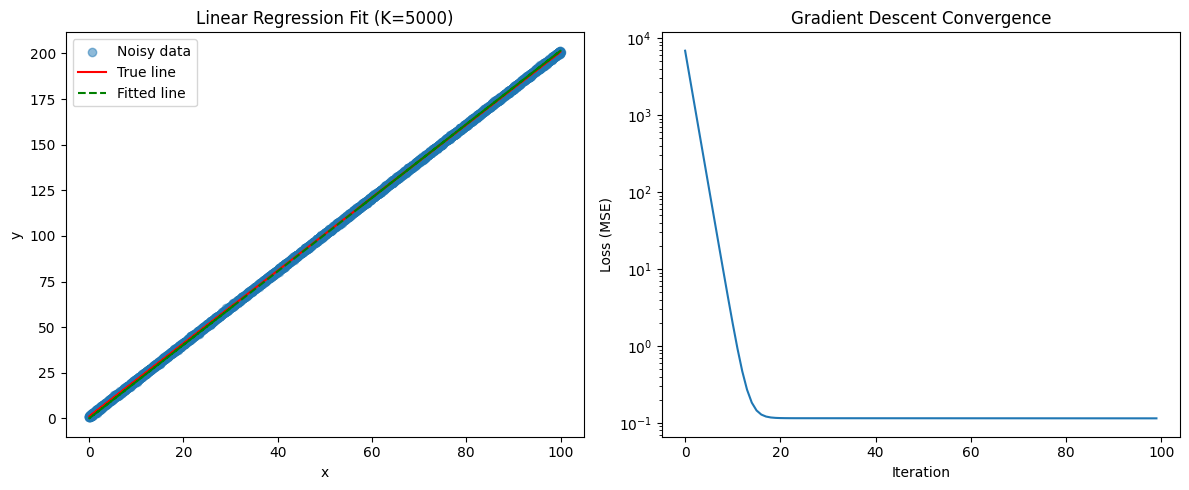

In [85]:
play(k=5000, iterations=100)

set k(number of samples) to 100000
set iterations to 100
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0145, b = 0.0326
Converged after 100 iterations


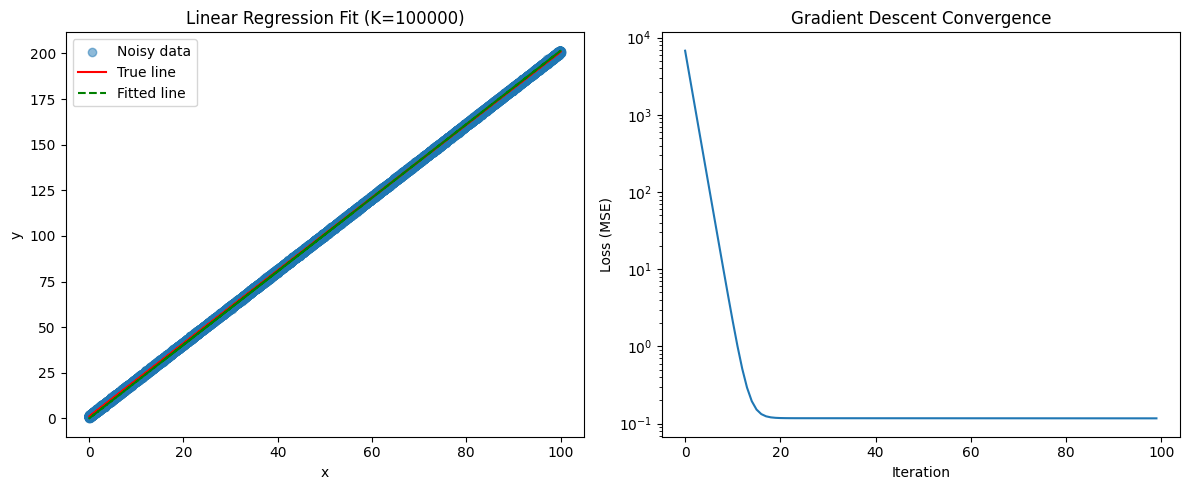

In [86]:
play(k=100000, iterations=100)

#### Playing With Learning Rate

set k(number of samples) to 50
set learning_rate to 0.0001
set iterations to 100
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0136, b = 0.0308
Converged after 100 iterations


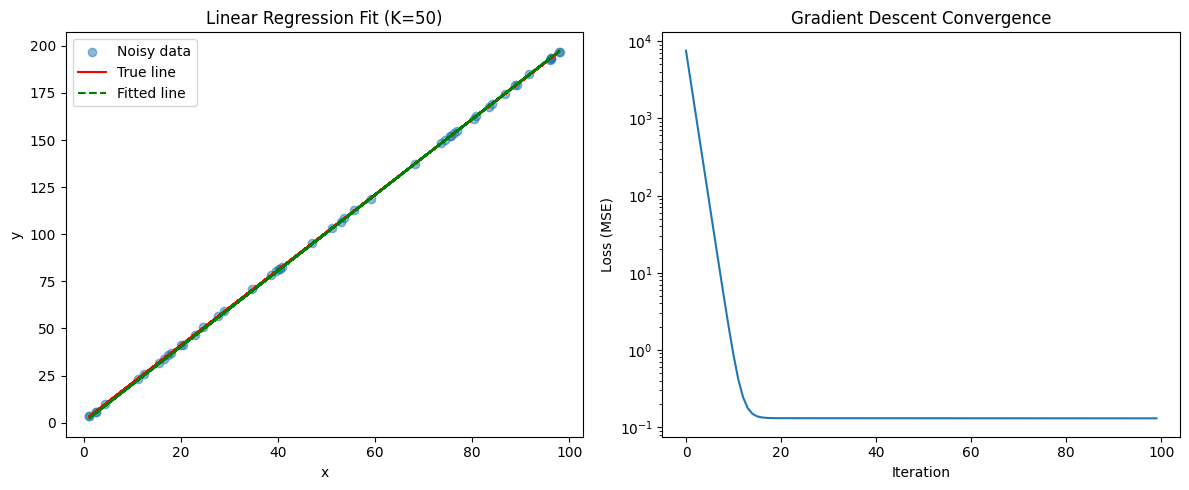

In [87]:
play(k=50, iterations=100, learning_rate=0.0001)

set k(number of samples) to 50
set learning_rate to 1e-05
set iterations to 100
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 1.9565, b = 0.0289
Converged after 100 iterations


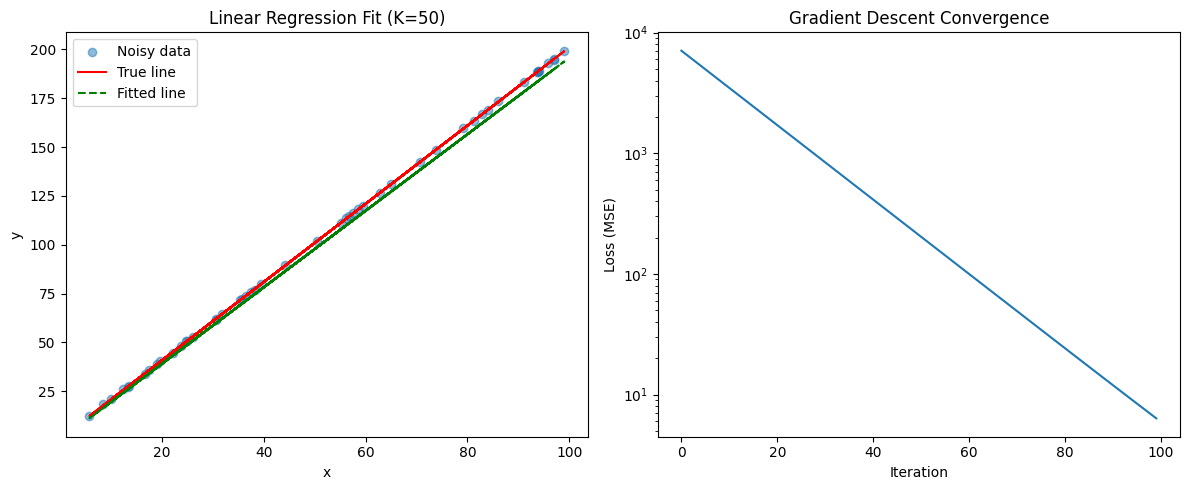

In [88]:
play(k=50, iterations=100, learning_rate=0.00001)

set k(number of samples) to 50
set learning_rate to 1e-06
set iterations to 100
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 0.5718, b = 0.0085
Converged after 100 iterations


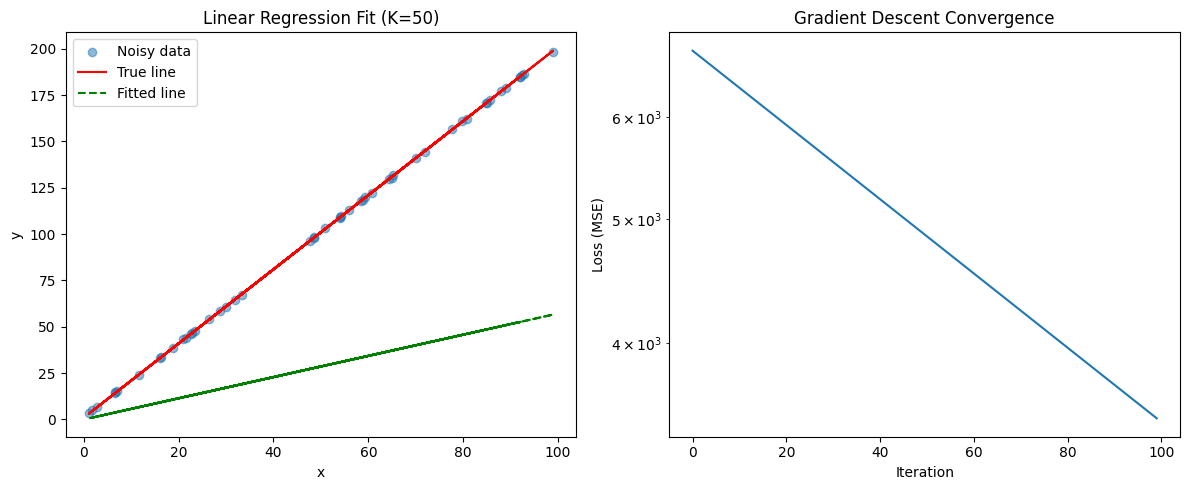

In [89]:
play(k=50, iterations=100, learning_rate=0.000001)

set k(number of samples) to 50
set learning_rate to 0.001
set iterations to 100
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = -50145784430982259810909343336597169373184.0000, b = -722062325774410559884757178580752924672.0000
Converged after 100 iterations


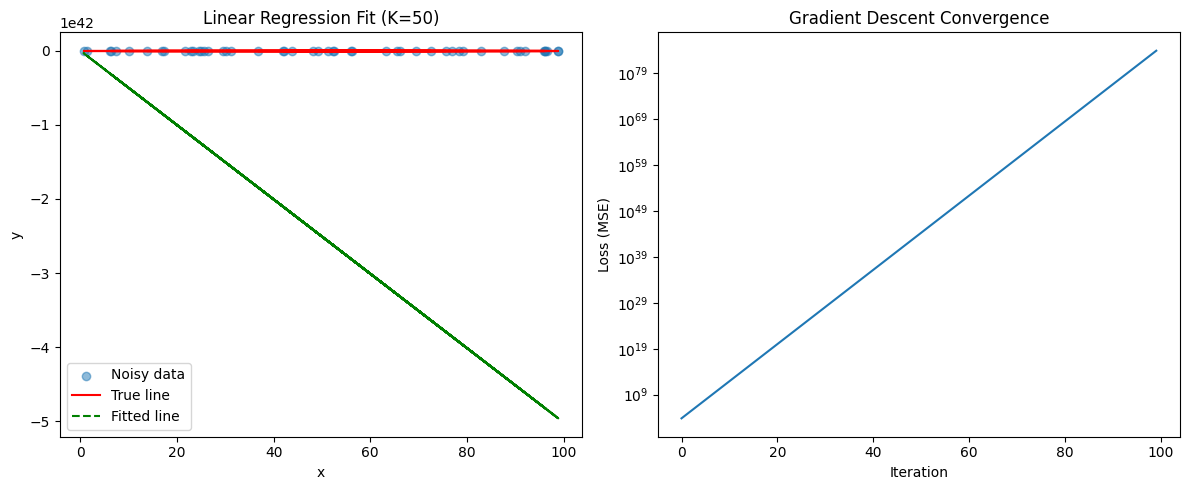

In [90]:
play(k=50, iterations=100, learning_rate=0.001)

#### Playing With Tolerance

set k(number of samples) to 50
set learning_rate to 0.0001
set iterations to 100
set tolerance to 0.001
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0139, b = 0.0303
Converged after 20 iterations


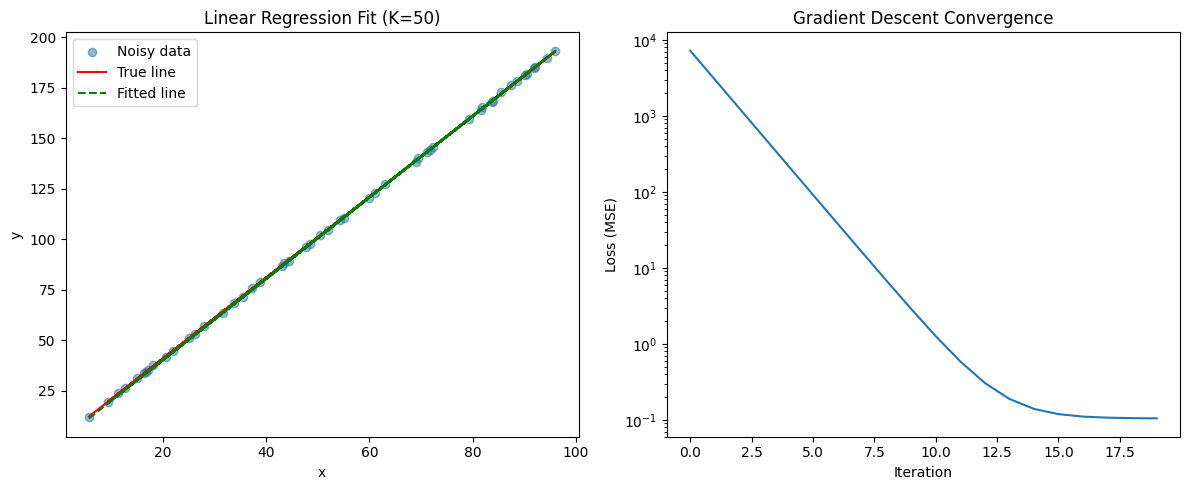

In [91]:
play(k=50, iterations=100, learning_rate=0.0001, tolerance=1e-3)

set k(number of samples) to 50
set learning_rate to 0.0001
set iterations to 100
set tolerance to 0.0001
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0133, b = 0.0282
Converged after 18 iterations


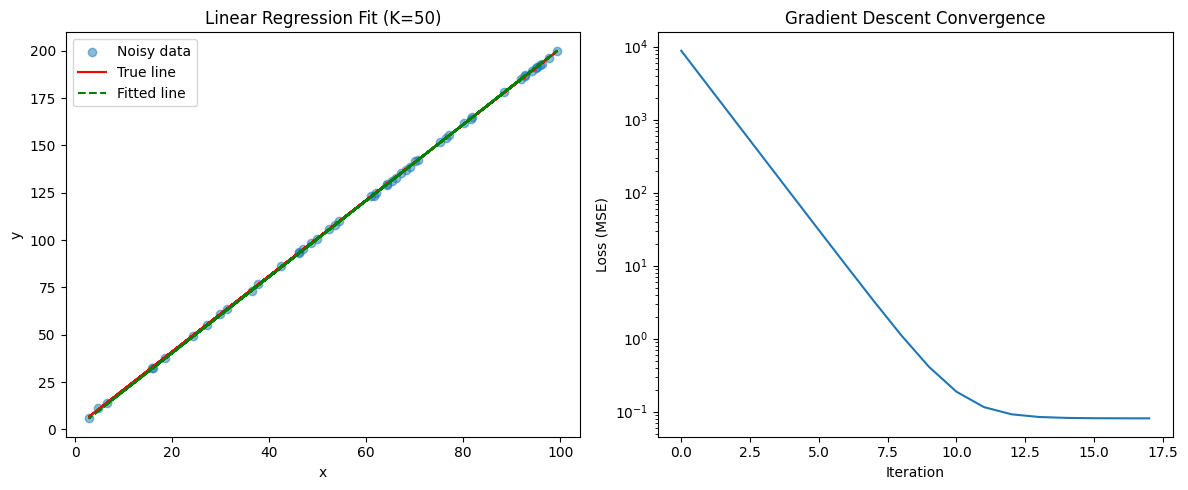

In [92]:
play(k=50, iterations=100, learning_rate=0.0001, tolerance=1e-4)

set k(number of samples) to 50
set learning_rate to 0.0001
set iterations to 100
set tolerance to 1e-06
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0138, b = 0.0297
Converged after 100 iterations


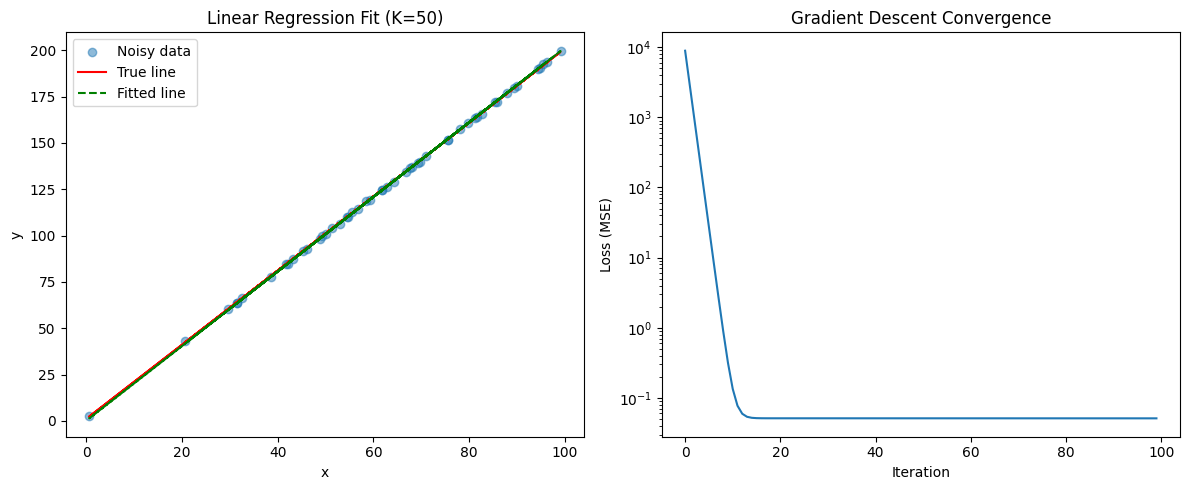

In [93]:
play(k=50, iterations=100, learning_rate=0.0001, tolerance=1e-6)

set k(number of samples) to 50
set learning_rate to 0.0001
set iterations to 100
set tolerance to 1e-07
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0155, b = 0.0342
Converged after 100 iterations


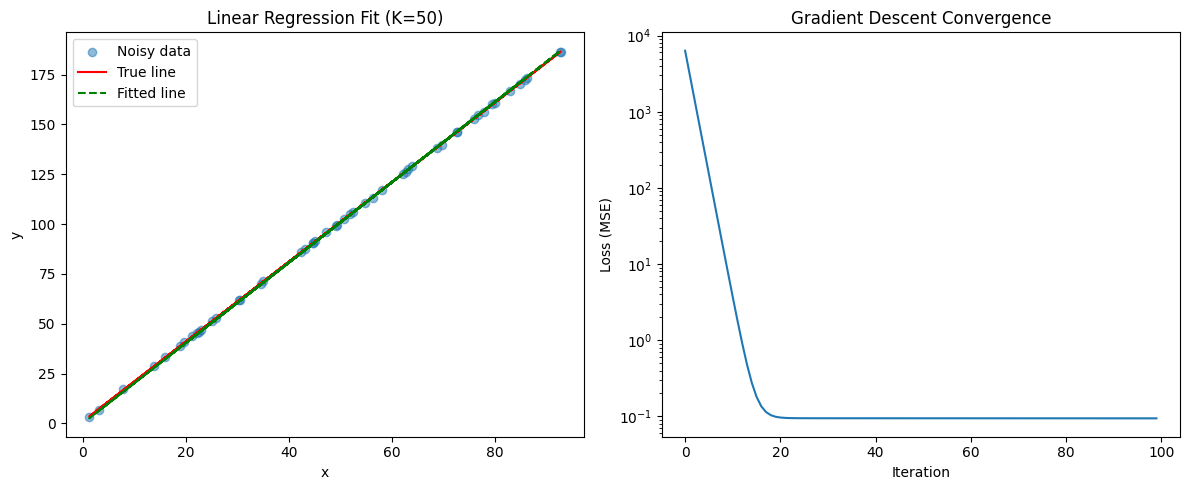

In [94]:
play(k=50, iterations=100, learning_rate=0.0001, tolerance=1e-7)

#### Playing With a

set k(number of samples) to 50
set a to 0.3
set learning_rate to 0.0001
set iterations to 100
set tolerance to 1e-06
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0151, b = 0.0339
Converged after 100 iterations


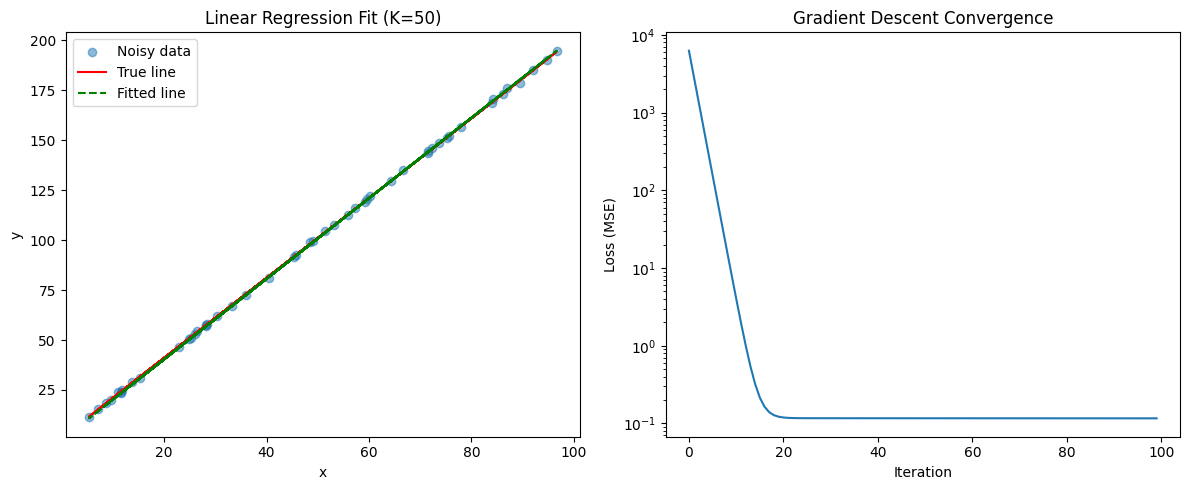

In [95]:
play(k=50, iterations=100, learning_rate=0.0001, tolerance=1e-6, a=0.3)

set k(number of samples) to 50
set a to 0.5
set learning_rate to 0.0001
set iterations to 100
set tolerance to 0.001
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0131, b = 0.0281
Converged after 17 iterations


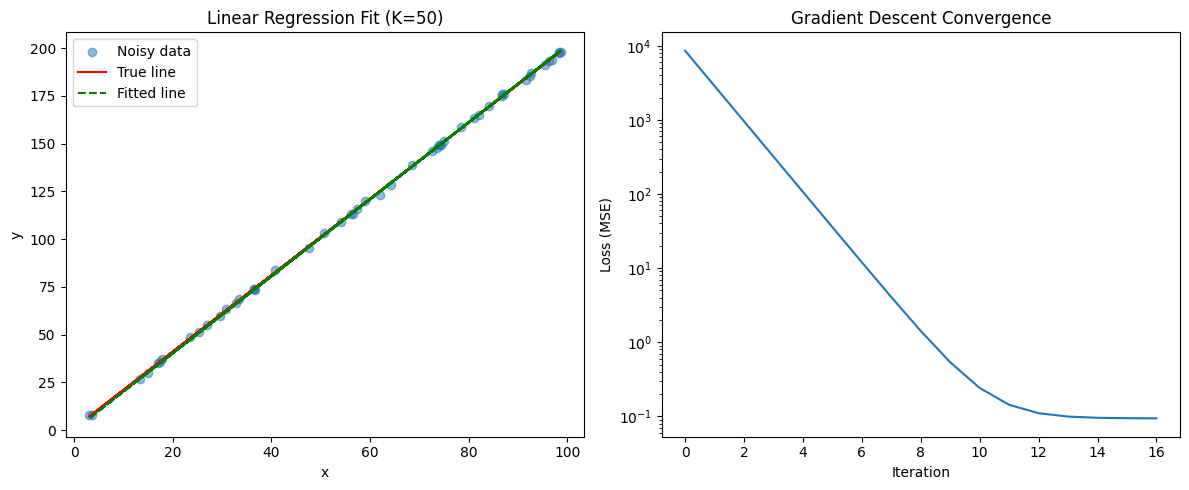

In [96]:
play(k=50, iterations=100, learning_rate=0.0001, tolerance=1e-3, a=0.5)

set k(number of samples) to 50
set a to 0.9
set learning_rate to 0.0001
set iterations to 100
set tolerance to 0.001
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0136, b = 0.0298
Converged after 20 iterations


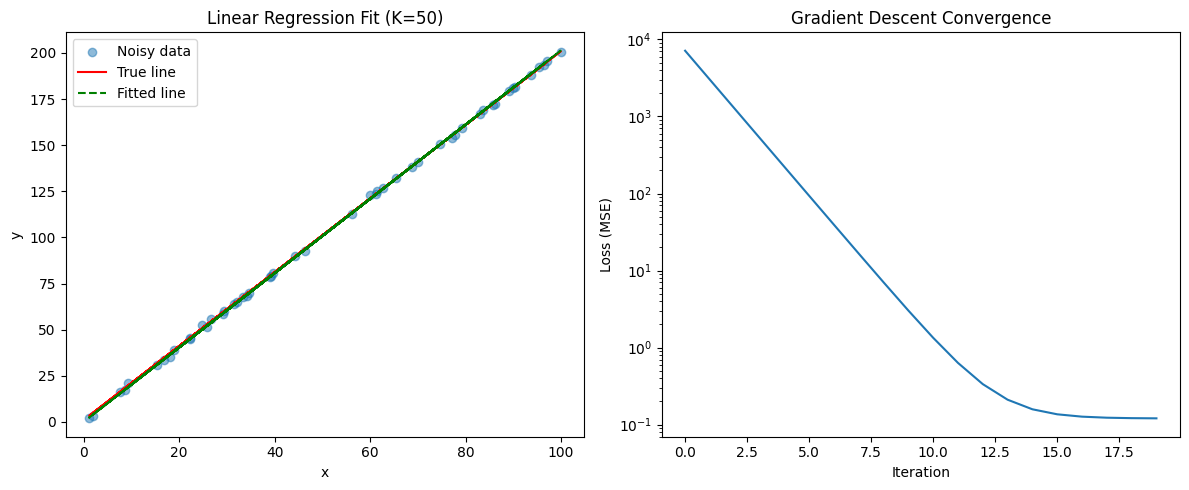

In [97]:
play(k=50, iterations=100, learning_rate=0.0001, tolerance=1e-3, a=0.9)

set k(number of samples) to 50
set a to 0.01
set learning_rate to 0.0001
set iterations to 100
set tolerance to 0.001
True parameters: m = 2.0000, b = 1.0000
Estimated parameters: m = 2.0128, b = 0.0278
Converged after 17 iterations


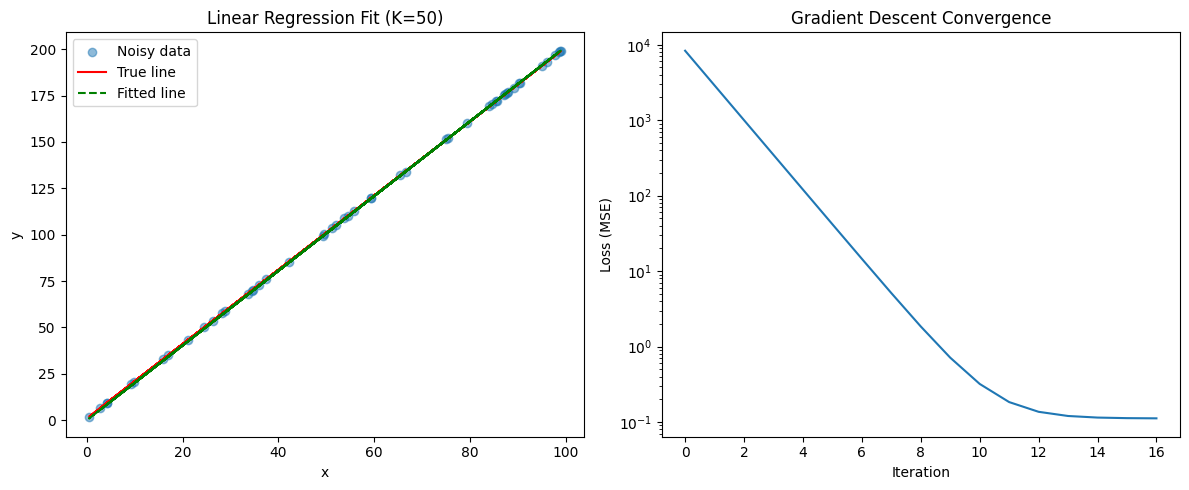

In [98]:
play(k=50, iterations=100, learning_rate=0.0001, tolerance=1e-3, a=0.01)